# Bibliotecas

In [113]:
import matplotlib as mpl
from pylab import cm
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [114]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 2)

# Funções Auxiliares

In [115]:
def read_file(file_path, columns = 5):
    with open(file_path, 'r') as file:
        dados = file.readlines()

    cor1_x  = list()
    cor1_y  = list()

    cor2_x  = list()
    cor2_y  = list()

    tempo   = list()

    for linha in dados[2:]:
        var      = linha.split()
        
        if len(var) == columns:
            tempo   += [float(var[0].replace(',','.'))]

            cor1_x  += [float(var[1].replace(',','.'))]
            cor1_y  += [float(var[2].replace(',','.').replace('\x00', ''))]
            
            if columns > 3:
                cor2_x  += [float(var[3].replace(',','.'))]
                cor2_y  += [float(var[4].replace(',','.').replace('\x00', ''))]
    if columns > 3:
        return tempo, cor1_x, cor1_y, cor2_x, cor2_y
    return tempo, cor1_x, cor1_y

In [116]:
def fit_func(t, a, b, c):
    return a*pow(1/np.cosh(b - c*t), 2)

def fit_func(t, a, x, c):
    h = 0.06
    L = (np.sqrt(4*pow(h, 3)/(3*a)))
    return a*pow(1/np.cosh(x/L - c*t/L), 2)

In [117]:
def chi_sq(obs, exp, err):
    soma = 0
    assert(len(obs) == len(exp)) #ERRO DE DIMENSÕES
    for i in range(len(obs)):
        soma += pow((obs[i] - exp[i])/err[i], 2)
    return soma

In [118]:
def get_ROI(x, y, cuts):
    
    ys = [[],[]]
    ts = [[],[]]
    
    for i in range(2):
        for j in range(len(x)):
            if (x[j] > cuts[i][0] and x[j] < cuts[i][1]):
                ts[i] += [x[j]]
                ys[i] += [y[j]]
                
    return ys[0], ys[1], ts[0], ts[1]

In [119]:
def correct(cor1_y, cor1_x, h): 
    eta = []
    beta = []

    theta = 0.927
    h_0=6
    r_z_0 = 0.021

    for i in range(len(cor1_x)):
        beta.append(np.arctan(cor1_x[i]/(cor1_y[i]+2*(r_z_0+(h-h_0)))))
        if (np.sin(2*beta[i]) == 0):
            eta.append((cor1_y[i])/2)
        else:
            eta.append(cor1_x[i]/np.sin(2*beta[i])-r_z_0-(h-h_0))
    return eta

# Dados a ajustar

In [120]:
data = ["h6B20A2", "h6a6b10_3b", "h5p5a4b10_2b", "h5p5a2b10_2b", "h4B40A1", "h4a6b10_5b_", "h4a4b10_barreira25_5b", "h4a4b10_5b_", "h4a2b20_5b", "h2a6b40_3b", "h2a6b10_2b", "h2a4b40_4b", "h2a2b40_3b"]

In [121]:
reg_interesse = [[[0.6, 2.3], [7, 8.5]], [[0.1, 1.25], [6, 7.5]], [[0, 1.25], [6.5, 7.8]], [[0, 2], [7, 8.75]], [[1.8, 4.5], [10, 12.5]], [[0.5, 3], [8.25, 10]], [[1.4, 4.3]], [[0, 2], [7.5, 9.8]], [[0.4, 2], [8, 9.88]]]

Determinating intervalos nos quais efetuar os fits e aproximações iniciais

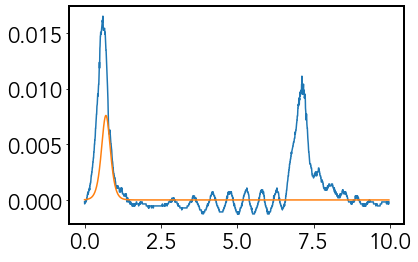

In [122]:
tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file("Dados/" + data[2] + ".txt")
h = float(data[2][1])

#cor1_y = correct(cor1_y, cor1_x, h)

#plt.xlim(8, 9.88)
plt.plot(tempo, cor1_y)

y = list()
for i in tempo:
    y += [fit_func(i, 0.0076, -0.7, -1)]

plt.plot(tempo, y)

In [123]:
one_peak = [0, 1, 2, 3] #LISTA COM OS ÍNDICES DOS DADOS COM APENAS 1 PICO
two_peak = [5, 7, 8]
tri_peak = [4]
mega_peak= [-1, -2, -3, -4, -5]

In [124]:
p1st_aprx = [0.0076, -0.7, -1]
p2nd_aprx = [0.0135, -8, -1]

In [125]:
def save(fig, filename):
    fig.savefig(filename + ".svg", bbox_inches='tight')

/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


17.13616680698485
163.54124233966292
19.29575360770882
38.04083385026624


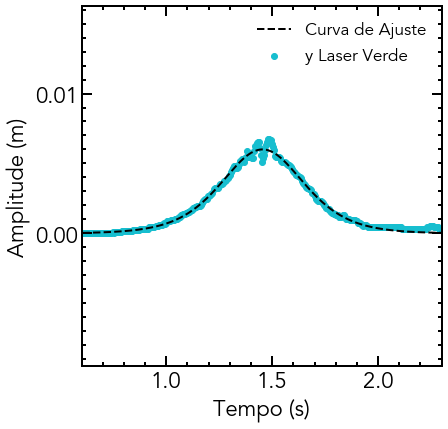

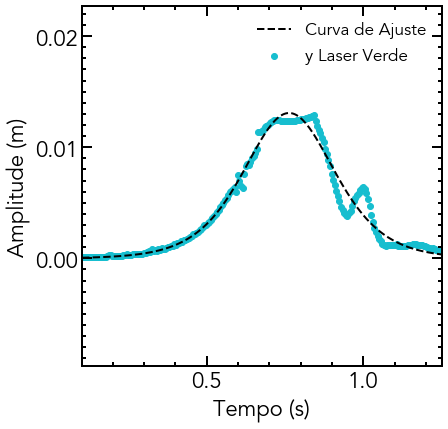

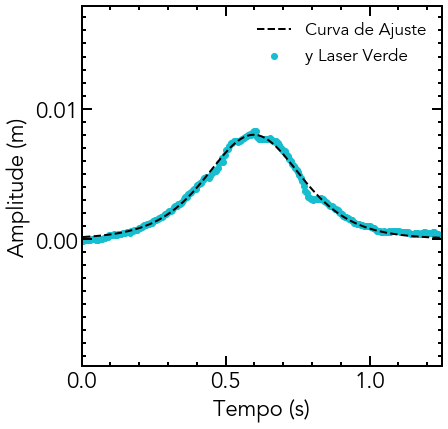

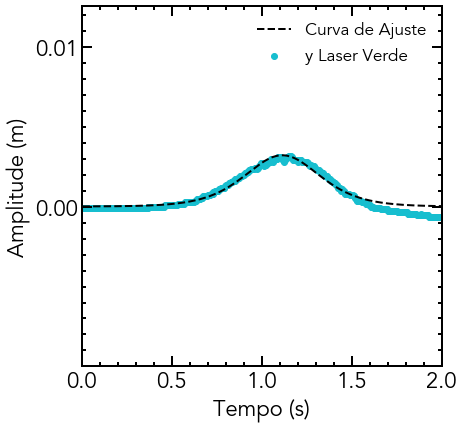

In [126]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 2)

count = 0
for i in one_peak:
    fig = plt.figure()
    ax2 = fig.add_axes([0, 0, 1, 1])
    fig.set_size_inches(5, 5)
    #get data
    h = float(data[i][1])
    tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file("Dados/" + data[i] + ".txt")
    cor1_y = correct(cor1_y, cor1_x, h)
    #select data from ROI
    y_b, y_t, t_b, t_t = get_ROI(tempo, cor1_y, reg_interesse[i])
    
    pars, cov = curve_fit(f=fit_func, xdata=t_b, ydata=y_b, p0=p1st_aprx)
    sigmas     = np.sqrt(np.diag(cov))
    
    #----------------------------------------------------------------------------#
    #----------------------------------AX2---------------------------------------#
    #----------------------------------------------------------------------------#

    ax2.set_xlim(reg_interesse[i][0][0], reg_interesse[i][0][1])
    #ax2.set_ylim(-0.001, 0.03)

    #ax2.set_yticklabels([0, 0, 0.5, 1, 1.5])

    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax2.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax2.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
    ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))
    
    ax2.set_xlabel('Tempo (s)')
    ax2.set_ylabel('Amplitude (m)')

    ax2.scatter(t_b, y_b, lw = "1", color=colors(1), label="y Laser Verde")

    #ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
    y = []
    for k in t_b:
        y += [fit_func(k, pars[0], pars[1], pars[2])]

    ax2.plot(t_b, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")
    
    ax2.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=17)
    save(fig, data[i])
    
    #print(str(round(pars[0], 3)) + " $\pm$ " + str(round(sigmas[0], 5)) + " & " +
    #      str(round(pars[1], 2)) + " $\pm$ " + str(round(sigmas[1], 5)) + " & " +
    #      str(round(pars[2], 2)) + " $\pm$ " + str(round(sigmas[2], 5)))
    expected = []
    err      = []
    
    for i in (t_b):
        expected += [fit_func(i, pars[0], pars[1], pars[2])]
        err += [0.0017/2]
    print(str(chi_sq(y_b, y, err)))

/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in cosh
  import sys


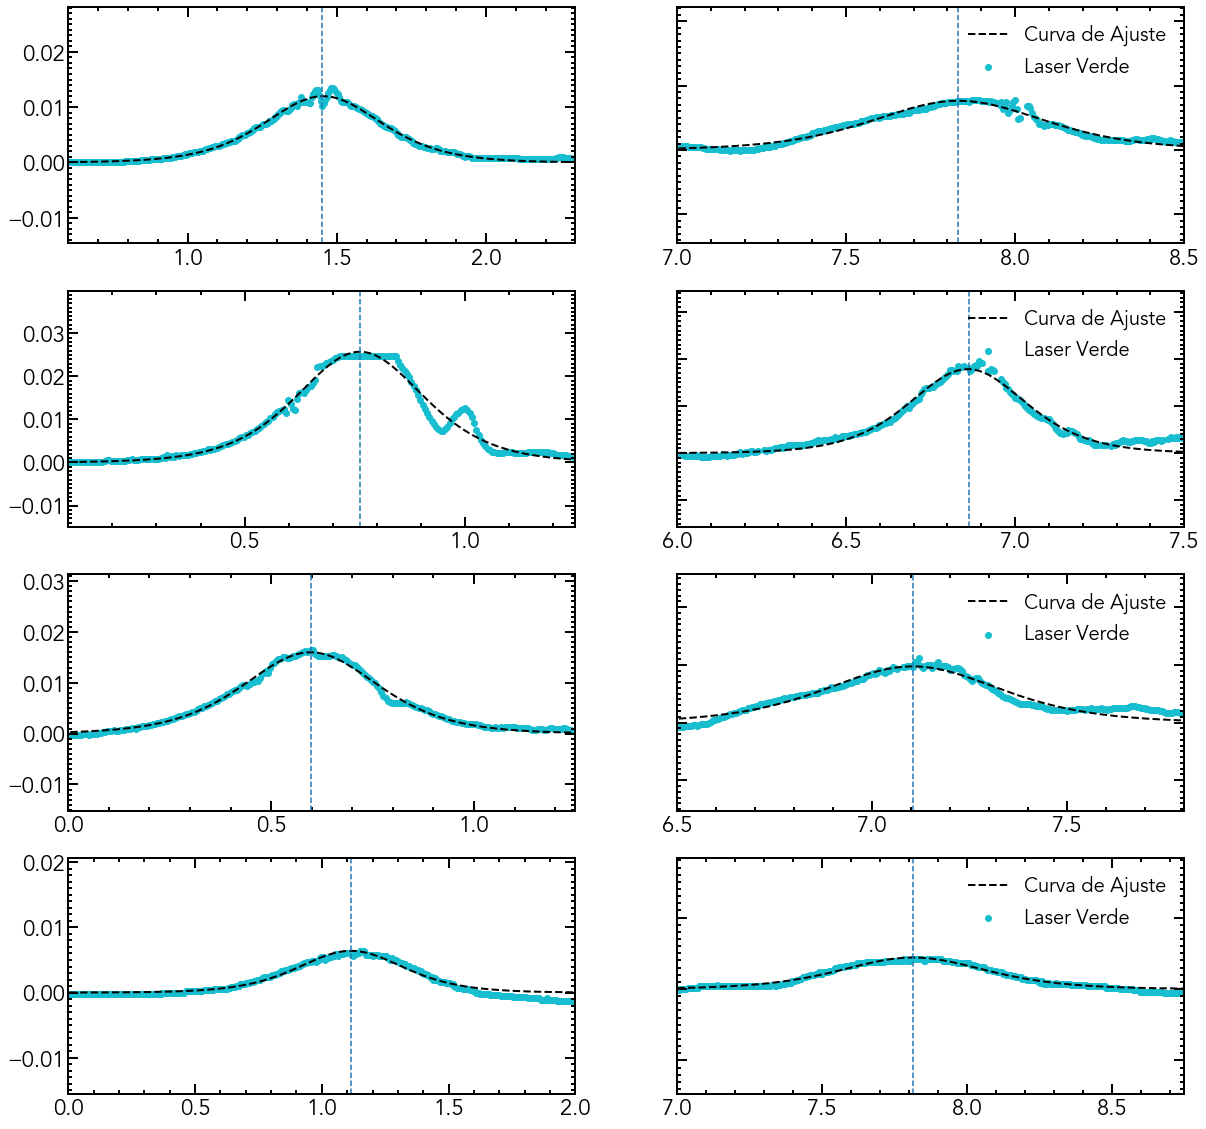

In [127]:
fig = plt.figure()
fig.set_size_inches(20, 20)

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 2)

count = 0
for i in one_peak:
    #get data
    h = float(data[i][1])
    tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file("Dados/" + data[i] + ".txt")
    #cor1_y = correct(cor1_y, cor1_x, h)
    #select data from ROI
    y_b, y_t, t_b, t_t = get_ROI(tempo, cor1_y, reg_interesse[i])
    
    pars, cov = curve_fit(f=fit_func, xdata=t_b, ydata=y_b, p0=p1st_aprx)
    sigmas     = np.sqrt(np.diag(cov))
    
    pars_2, cov = curve_fit(f=fit_func, xdata=t_t, ydata=y_t, p0=p2nd_aprx)
    #sigmas    = np.sqrt(np.diag(cov))
    
    
    count += 1
    ax2 = fig.add_subplot(len(one_peak),2,count)      # FIT DO SOLITÃO A SAIR
    count += 1
    ax3= fig.add_subplot(len(one_peak),2,count)      # FIT DO SOLITÃO A VOLTAR
    
    #----------------------------------------------------------------------------#
    #----------------------------------AX2---------------------------------------#
    #----------------------------------------------------------------------------#

    ax2.set_xlim(reg_interesse[i][0][0], reg_interesse[i][0][1])
    #ax2.set_ylim(-0.001, 0.03)

    #ax2.set_yticklabels([0, 0, 0.5, 1, 1.5])

    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax2.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax2.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
    ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

    ax2.scatter(t_b, y_b, lw = "1", color=colors(1), label="Laser Verde")

    #ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
    y = []
    for k in t_b:
        y += [fit_func(k, pars[0], pars[1], pars[2])]

    ax2.plot(t_b, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")
    
    dt = t_b[y.index(max(y))]
    ax2.axvline(dt, linestyle='--')

    #ax2.legend(bbox_to_anchor=(0.62, 1), loc=1, frameon=False, fontsize=17)

    #----------------------------------------------------------------------------#
    #----------------------------------AX3---------------------------------------#
    #----------------------------------------------------------------------------#
    ax3.set_xlim(reg_interesse[i][1][0], reg_interesse[i][1][1])
    #ax3.set_ylim(-0.001, 0.03)

    ax3.set_yticklabels([])

    ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax3.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
    ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax3.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

    ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
    ax3.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
    ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

    ax3.scatter(t_t, y_t, lw = "1", color=colors(1), label="Laser Verde")

    #ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
    y = []
    errs = []
    for k in t_t:
        y += [fit_func(k, pars_2[0], pars_2[1], pars_2[2])]
        errs += [1]
        

    ax3.plot(t_t, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")
    
    dt = t_t[y.index(max(y))]
    ax3.axvline(dt, linestyle='--')

    ax3.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=20)

# Determinação dos Tempos através do Laser azul

In [139]:
def plot(tempo, verde, azul, delta_max=0, filename="", ymin=-0.005):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in')
    
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    
    ax.set_yticklabels([0, 0, 1, 2, 3, 4])
    
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
    
    init_b = azul[10]
    init_g = verde[10]
    #init_g = 0
    
    stop_b = 0
    stop_g = 0
    
    for i in range(len(tempo)):
        #print("y_azul: " + str(azul[i]) + "\ndelta_max: " + str(delta_max) + "\ndiferença: " + str(abs(azul[i] - init)) + "\n\n")
        if (abs(azul[i] - init_b) > delta_max):
            stop_b = tempo[i]
        if (abs(verde[i] - init_g and not stop_g) > 1000*delta_max):
            stop_g = tempo[i]
        if (stop_g and stop_b):
            break
            
    ymax_b = max(azul)
    ymax_g = max(verde)
    ymax   = max(ymax_b, ymax_g)
    
    
    ax.set_xlim(-0.1, tempo[-1])
    ax.set_ylim(ymin, ymax + ymax/3)
            
    ax.annotate(r'   $\Delta$tempo' + "\n   " + str(round(stop_b - stop_g, 3)), xy=(stop_g, ymax + ymax/6), xytext=(stop_b, ymax + ymax/6),
            arrowprops={'arrowstyle': '<->'}, va='center')
    
    ax.plot(tempo, verde, color="green", lw="2", label="y laser verde")
    ax.plot(tempo, azul, color="blue", lw="2", label="y laser azul"   )
    
    erro = 0.005*20
    
    area = np.linspace(-10, 10, len(tempo))
    ax.axvline(stop_b, linestyle='--', color = "blue")
    ax.fill_betweenx(area, stop_b - erro, stop_b + erro, facecolor ='blue', alpha = 0.1)
    
    ax.axvline(stop_g, linestyle='--', color = "green")
    ax.fill_betweenx(area, stop_g - erro, stop_g + erro, facecolor ='green', alpha = 0.1)
    
    plt.title(filename)
    ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=22)
    
    ax.set_xlabel('Tempo (s)', labelpad=10, size=24)
    ax.set_ylabel('Amplitude (cm)', labelpad=10, size=24)
    
    print(stop_g)
    
    
    plt.savefig(filename + ".png", bbox_inches='tight')

0.578665495
0.005076014
0.005078024
0.371425688


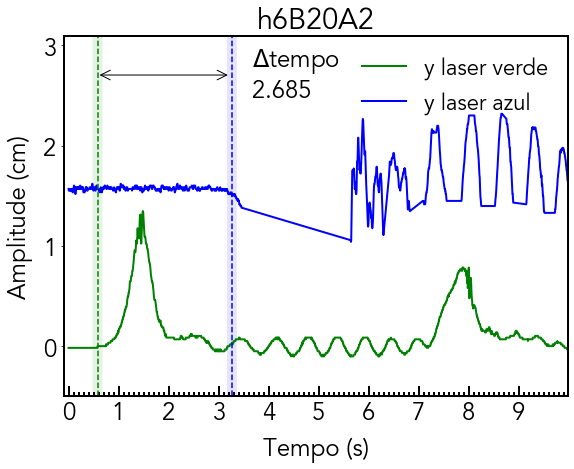

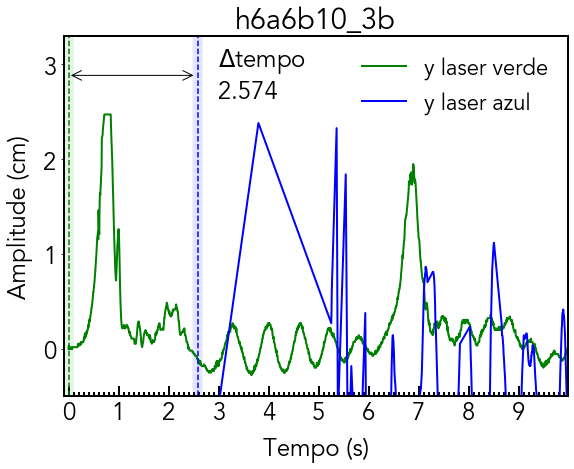

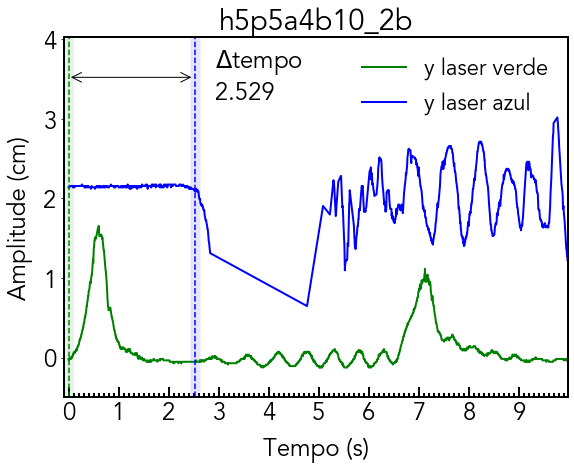

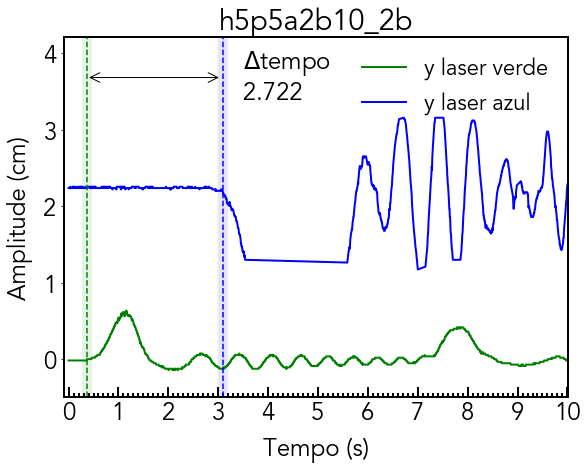

In [129]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 2)

for i in one_peak:
    #get data
    tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file("Dados/" + data[i] + ".txt")
    plot(tempo, cor1_y, cor2_y, 0.00052, data[i])
    
    
    
    
    
    
    
    

0.0761402
0.00508802
0.005096009
0.01524305
0.299484789


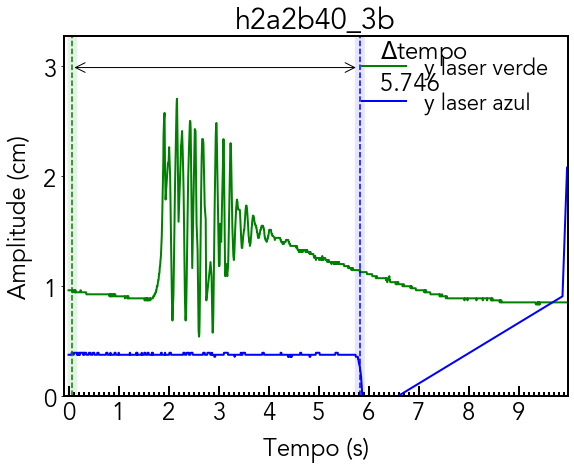

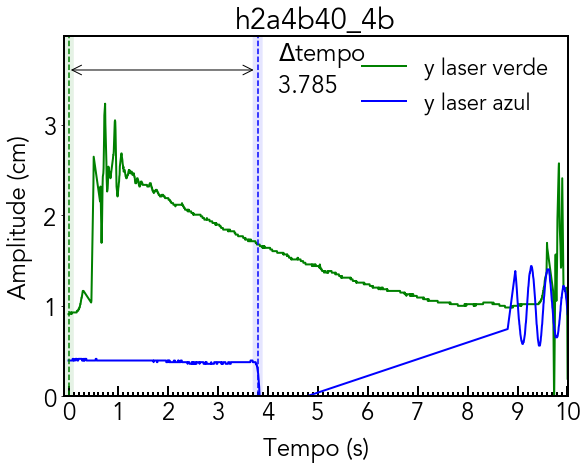

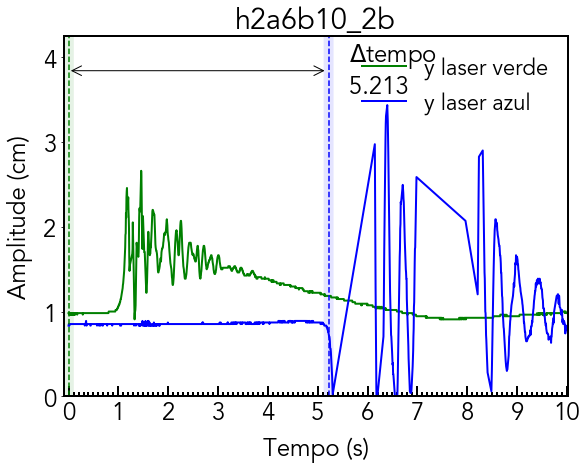

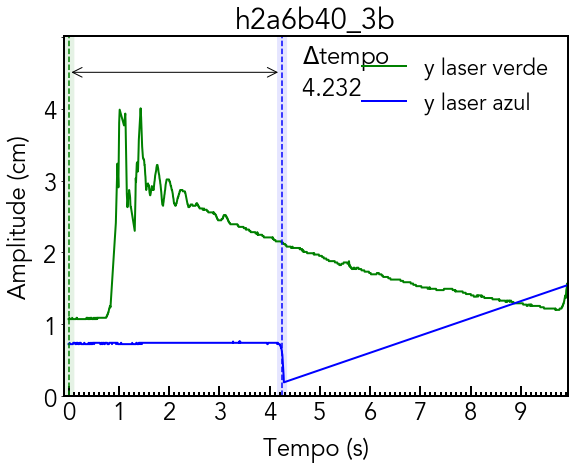

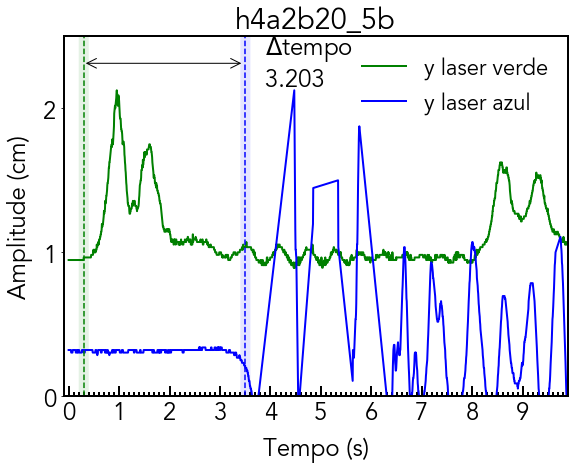

In [143]:
for i in mega_peak:
    #get data
    tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file("Dados/" + data[i] + ".txt")
    plot(tempo, cor1_y, cor2_y, 0.000999999, data[i], ymin = -0.01)

1.72110927


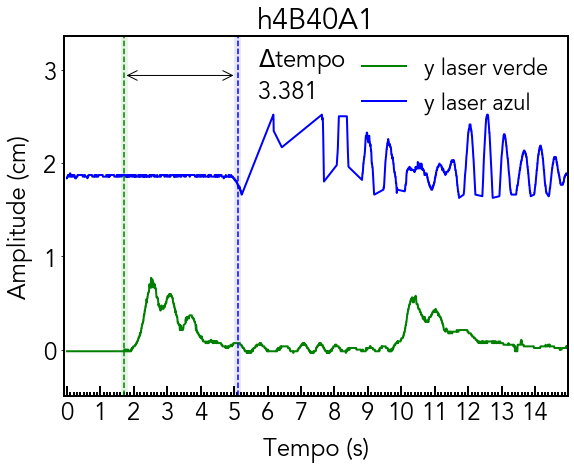

In [146]:
for i in tri_peak:
    #get data
    tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file("Dados/" + data[i] + ".txt")
    plot(tempo, cor1_y, cor2_y, 0.0005245, data[i])